# **Latar Belakang**

Amazon SaaS (Software as a Service) merupakan sub-unit dari Amazon Store, yang sudah hadir sejak **November 2016** sebagai salah satu model layanan cloud computing di mana sebuah perangkat lunak (software) disediakan oleh penyedia layanan dan dapat digunakan oleh pengguna melalui internet tanpa perlu instalasi atau dikelola secara langsung di komputer/laptop pengguna.

## **Pernyataan Masalah**

Fokus analisis ini adalah menginvestigasi ketimpangan kinerja bisnis dengan menelaah distribusi keseluruhan penjualan dan profit berdasarkan produk, mengevaluasi margin keuntungan untuk melihat apakah tingginya penjualan selalu berbanding lurus dengan profitabilitas, mengidentifikasi perbedaan di tingkat industri, serta melakukan breakdown per negara untuk membandingkan produk unggulan dengan yang lemah. Urgensi dari penelitian ini untuk memberikan wawasan strategis yang lebih tajam terkait pola ketimpangan penjualan dan profit, membantu perusahaan mengalokasikan sumber daya secara lebih efektif, serta menjadi dasar pengambilan keputusan dalam meningkatkan profitabilitas sekaligus memperkuat daya saing di pasar global.

###Hypothesis
H₀ (Null Hypothesis): Tidak terdapat hubungan yang signifikan antara tingkat discount yang diberikan dengan tingkat profit yang dihasilkan pada penjualan produk Amazon SaaS.

H₁ (Alternative Hypothesis): Terdapat hubungan positif yang signifikan antara tingkat discount yang diberikan dengan tingkat profit yang dihasilkan, di mana semakin tinggi discount yang diberikan, maka semakin tinggi pula profit yang dihasilkan.

# **Data**

Pertama-tama kita akan menganalisa data yang telah dikumpulkan oleh perusahaan. Yang meliputi;
1. Row ID: A unique identifier for each transaction
2. Order ID: A unique identifier for each order
3. Order Date: The date when the order was placed
4. Date Key: A numerical representation of the order date (YYYYMMDD)
5. Contact Name: The name of the person who placed the order
6. Country: The country where the order was placed
7. City: The city where the order was placed
8. Region: The region where the order was placed
9. Subregion: The subregion where the order was placed
10. Customer: The name of the company that placed the order
11. Customer ID: A unique identifier for each customer
12. Industry: The industry the customer belongs to
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.)
14. Product: The product was ordered
15. License: The license key for the product
16. Sales: The total sales amount for the transaction
17. Quantity: The total number of items in the transaction
18. Discount: The discount applied to the transaction
19. Profit: The profit from the transaction

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)

file_path = "/content/drive/MyDrive/Capstone_Project_Module_2_Lingga_SaaS_Sales/SaaS-Sales.csv"
df = pd.read_csv(file_path)

df.head()


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


## **Data Understanding and Cleaning**

Sebelum melakukan analisis mendalam, tahapan data understanding dan data cleaning menjadi krusial untuk memastikan kualitas serta keandalan hasil analisis. Pada konteks data penjualan **Amazon SaaS**, proses ini sangat penting karena karakteristik data yang cukup kompleks, misalnya adanya **keragaman geografis** yang mencakup berbagai negara dan region, variasi struktur harga yang dapat menghasilkan outliers namun tetap sahih, serta pola transaksi **B2B** yang kerap menunjukkan seasonality dan ketidakteraturan. Begitu juga, keberadaan missing values pada informasi pelanggan atau industri juga bisa menjadi indikator adanya segmentasi tertentu yang perlu diperhatikan sehingga proses *data cleaning* dapat dilakukan secara tepat dengan justifikasi yang kuat, baik dari sudut pandang domain knowledge maupun pertimbangan statistik.

## 1. Data type

In [ ]:
summary = pd.DataFrame({
    "Non-Null Count": df.notnull().sum(),
    "Null Count": df.isnull().sum(),
    "Dtype": df.dtypes
})
summary.index.name = "Column"
summary.reset_index(inplace=True)

summary.index = summary.index + 1

dtype_counts = df.dtypes.value_counts().reset_index()
dtype_counts.columns = ["Dtype", "Count"]

dtype_summary = pd.DataFrame({
    "Column": ["Data Type Summary"],
    "Non-Null Count": [""],
    "Null Count": [""],
    "Dtype": [", ".join([f"{count} {dtype}" for dtype, count in zip(dtype_counts['Dtype'], dtype_counts['Count'])])]
})

summary = pd.concat([summary, dtype_summary], ignore_index=True)

display(summary)

,Column,Non-Null Count,Null Count,Dtype
0,Row ID,9994,0,int64
1,Order ID,9994,0,object
2,Order Date,9994,0,object
3,Date Key,9994,0,int64
4,Contact Name,9994,0,object
5,Country,9994,0,object
6,City,9994,0,object
7,Region,9994,0,object
8,Subregion,9994,0,object
9,Customer,9994,0,object


##Data Deskriptif

In [ ]:
print("\nDescriptive Statistics for selected columns:")
selected_cols = ['Profit', 'Discount', 'Customer ID', 'Date Key', 'Sales', 'Quantity']
display(df[selected_cols].describe().loc[['count', 'mean', 'min', 'max']])


Descriptive Statistics for selected columns:


Column,Profit,Discount,Customer ID,Date Key,Sales,Quantity
count,9994.000000,9994.000000,9994.000000,9.994000e+03,9994.000000,9994.000000
mean,28.656896,0.156203,1049.771963,2.021803e+07,229.858001,3.789574
min,-6599.978000,0.000000,1001.000000,2.020010e+07,0.444000,1.000000
max,8399.976000,0.800000,1101.000000,2.023123e+07,22638.480000,14.000000


## Data Baru: Profit Margin

In [ ]:
df['profit margin'] = (df['Profit'] / df['Sales']) * 100
display(df.head())

Column,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,profit margin
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,47.00
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25


##Checking Anomalies

In [ ]:
categorical_cols_to_check = ['Country', 'City', 'Region', 'Subregion', 'Industry', 'Segment', 'Product']

for col in categorical_cols_to_check:
    unique_counts = df[col].value_counts()
    print(f"\nAnalysis for {col}:")
    print(f"Number of unique values: {df[col].nunique()}")

    display(unique_counts.head(10))


Analysis for Country:
Number of unique values: 48


,count
Country,
United States,2001
United Kingdom,1141
Japan,985
France,587
Canada,506
Australia,492
Mexico,469
Germany,383
Brazil,255



Analysis for City:
Number of unique values: 262


,count
City,
London,922
New York City,740
Paris,537
Los Angeles,510
Toronto,431
Tokyo,405
Sydney,314
Mexico City,193
Seattle,170



Analysis for Region:
Number of unique values: 3


,count
Region,
EMEA,4219
AMER,3665
APJ,2110



Analysis for Subregion:
Number of unique values: 12


,count
Subregion,
NAMER,2507
EU-WEST,1614
UKIR,1267
LATAM,1158
JAPN,985
ANZ,529
NOR,489
APAC,447
MEA,396



Analysis for Industry:
Number of unique values: 10


,count
Industry,
Finance,2127
Energy,1316
Tech,1236
Manufacturing,1222
Healthcare,1049
Consumer Products,1021
Retail,972
Communications,593
Transportation,351



Analysis for Segment:
Number of unique values: 3


,count
Segment,
SMB,5191
Strategic,3020
Enterprise,1783



Analysis for Product:
Number of unique values: 14


,count
Product,
ContactMatcher,1842
Support,1560
FinanceHub,981
SaaS Connector Pack,957
Site Analytics,889
Marketing Suite - Gold,846
ChatBot Plugin,796
Data Smasher,775
OneView,466


## 3. Identifikasi ***Unique Values***

In [ ]:
print("ANALISIS UNIQUE VALUES")

cols_to_analyze = df.columns[:df.columns.get_loc('Profit') + 1]

print("\nKolom dengan jumlah unique values tinggi (Row ID hingga Profit):")
for col in cols_to_analyze:
    if df[col].nunique() > 50:
        print(f"- {col}: {df[col].nunique()} unique values")

ANALISIS UNIQUE VALUES

Kolom dengan jumlah unique values tinggi (Row ID hingga Profit):
- Row ID: 9994 unique values
- Order ID: 5009 unique values
- Order Date: 1237 unique values
- Date Key: 1237 unique values
- Contact Name: 793 unique values
- City: 262 unique values
- Customer: 99 unique values
- Customer ID: 99 unique values
- License: 9994 unique values
- Sales: 5825 unique values
- Profit: 7287 unique values


### Produk

--- Analysis for Product ---
Number of unique values: 14
Top 20 unique values and their counts:


,count
Product,
ContactMatcher,1842
Support,1560
FinanceHub,981
SaaS Connector Pack,957
Site Analytics,889
Marketing Suite - Gold,846
ChatBot Plugin,796
Data Smasher,775
OneView,466


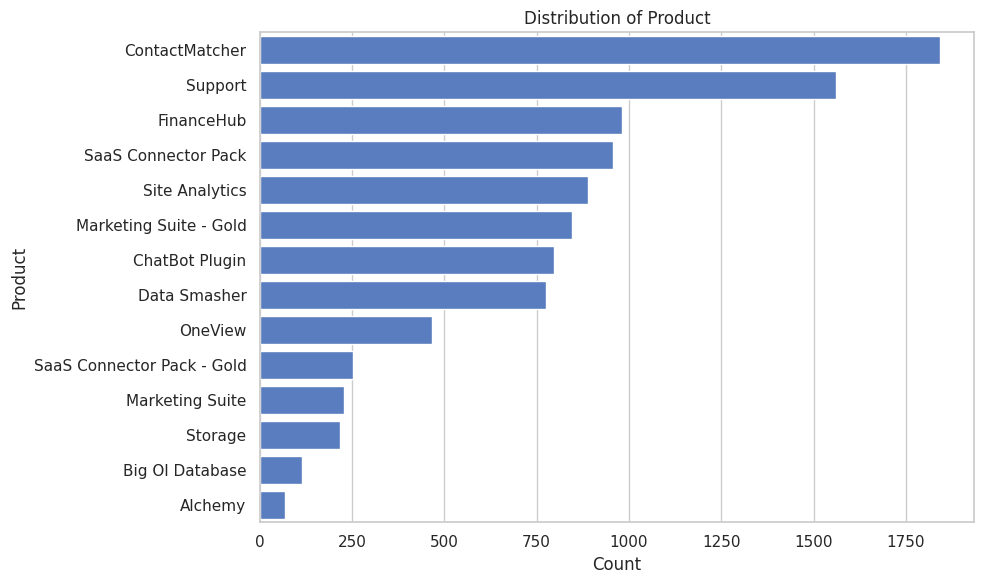

In [ ]:
print("--- Analysis for Product ---")
unique_counts = df['Product'].value_counts()
print(f"Number of unique values: {df['Product'].nunique()}")
print("Top 20 unique values and their counts:")
display(unique_counts.head(20))

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Product', order=unique_counts.index)
plt.title('Distribution of Product')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

### Industri

--- Analysis for Industry ---
Number of unique values: 10
Unique values and their counts:


,count
Industry,
Finance,2127
Energy,1316
Tech,1236
Manufacturing,1222
Healthcare,1049
Consumer Products,1021
Retail,972
Communications,593
Transportation,351


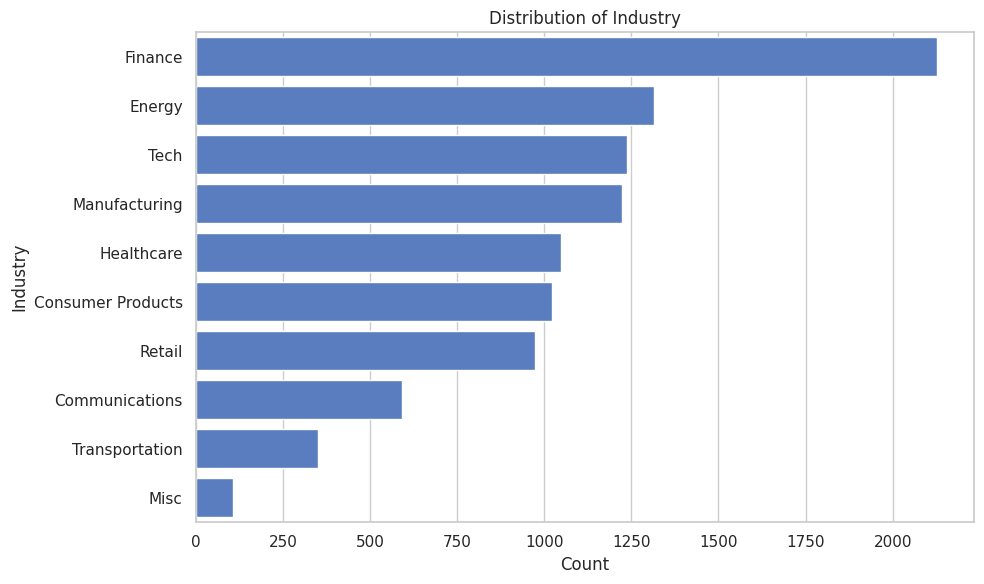

In [ ]:
print("--- Analysis for Industry ---")
unique_counts = df['Industry'].value_counts()
print(f"Number of unique values: {df['Industry'].nunique()}")
print("Unique values and their counts:")
display(unique_counts)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Industry', order=unique_counts.index)
plt.title('Distribution of Industry')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

### Segmentasi

--- Analysis for Segment ---
Number of unique values: 3
Unique values and their counts:


,count
Segment,
SMB,5191
Strategic,3020
Enterprise,1783


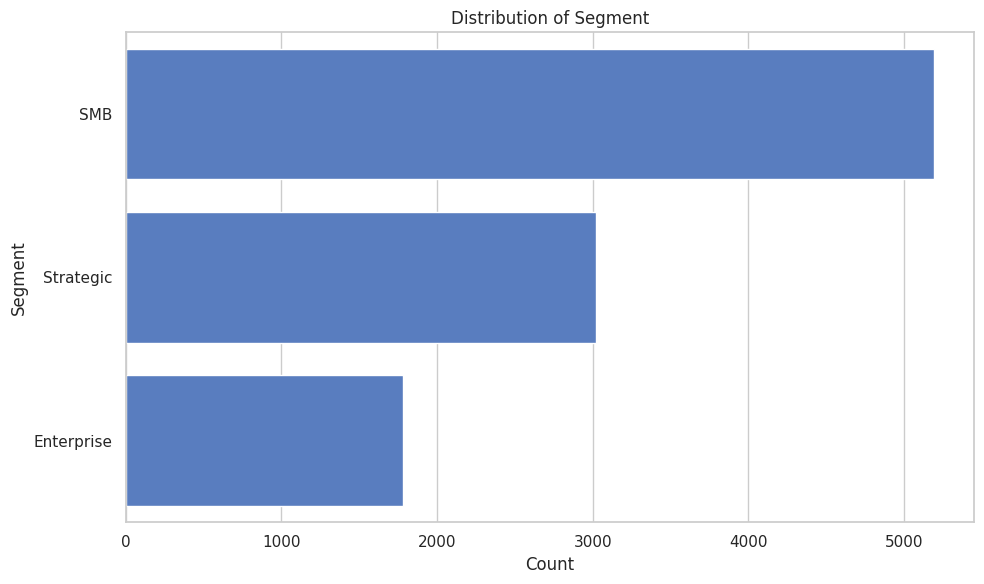

In [ ]:
print("--- Analysis for Segment ---")
unique_counts = df['Segment'].value_counts()
print(f"Number of unique values: {df['Segment'].nunique()}")
print("Unique values and their counts:")
display(unique_counts)

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Segment', order=unique_counts.index)
plt.title('Distribution of Segment')
plt.xlabel('Count')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

### Region

--- Analysis for Region ---
Number of unique values: 3
Unique values and their counts:


,count
Region,
EMEA,4219
AMER,3665
APJ,2110


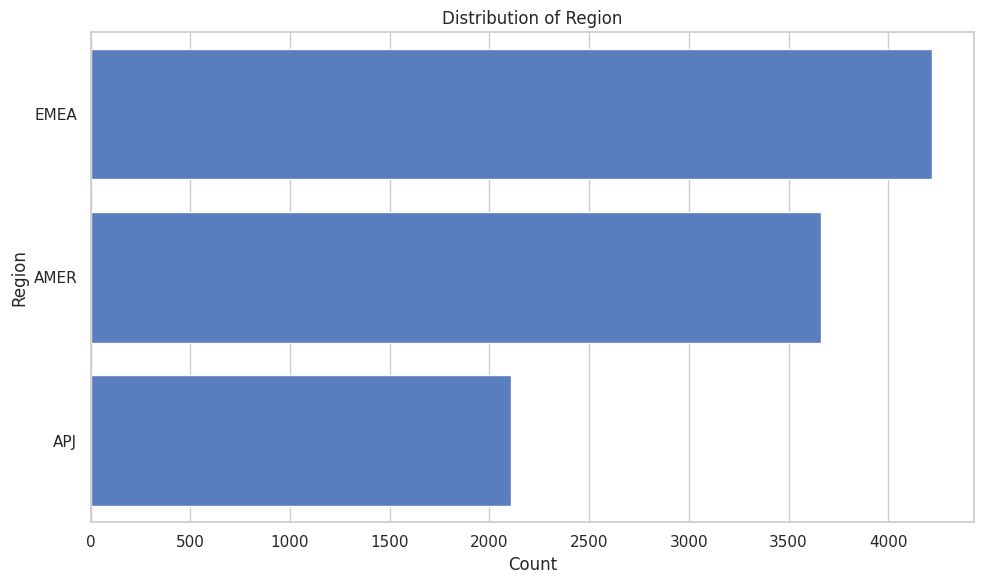

In [ ]:
print("--- Analysis for Region ---")
unique_counts = df['Region'].value_counts()
print(f"Number of unique values: {df['Region'].nunique()}")
print("Unique values and their counts:")
display(unique_counts)

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Region', order=unique_counts.index)
plt.title('Distribution of Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

### Sub-region

--- Analysis for Subregion ---
Number of unique values: 12
Unique values and their counts:


,count
Subregion,
NAMER,2507
EU-WEST,1614
UKIR,1267
LATAM,1158
JAPN,985
ANZ,529
NOR,489
APAC,447
MEA,396


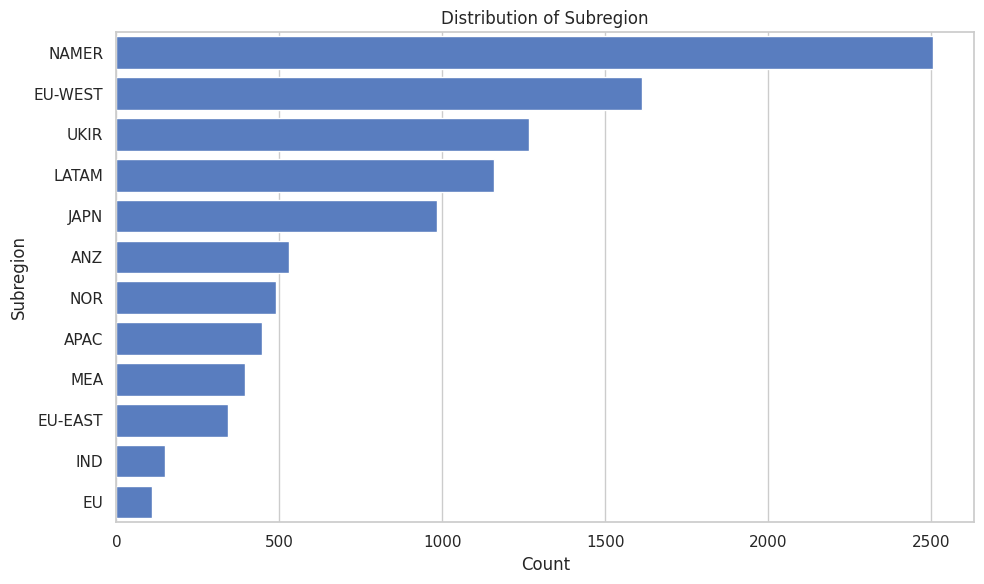

In [ ]:
print("--- Analysis for Subregion ---")
unique_counts = df['Subregion'].value_counts()
print(f"Number of unique values: {df['Subregion'].nunique()}")
print("Unique values and their counts:")
display(unique_counts)

if df['Subregion'].nunique() <= 20:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y='Subregion', order=unique_counts.index)
    plt.title('Distribution of Subregion')
    plt.xlabel('Count')
    plt.ylabel('Subregion')
    plt.tight_layout()
    plt.show()

## 4. Pemeriksaan ***Outliers***

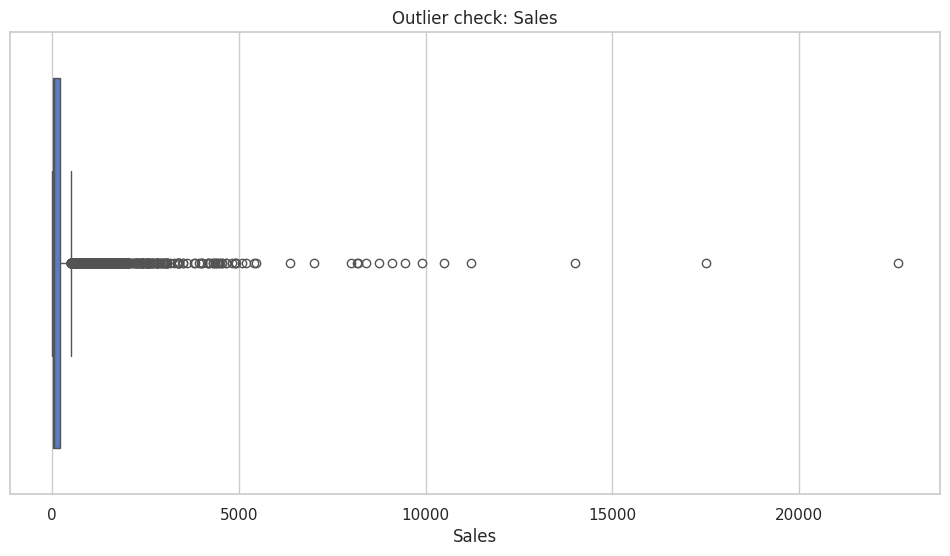

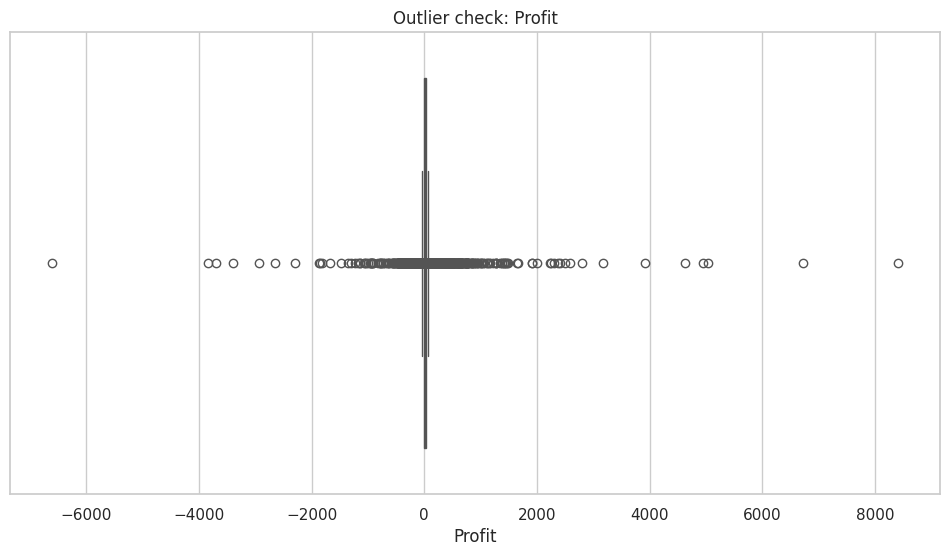

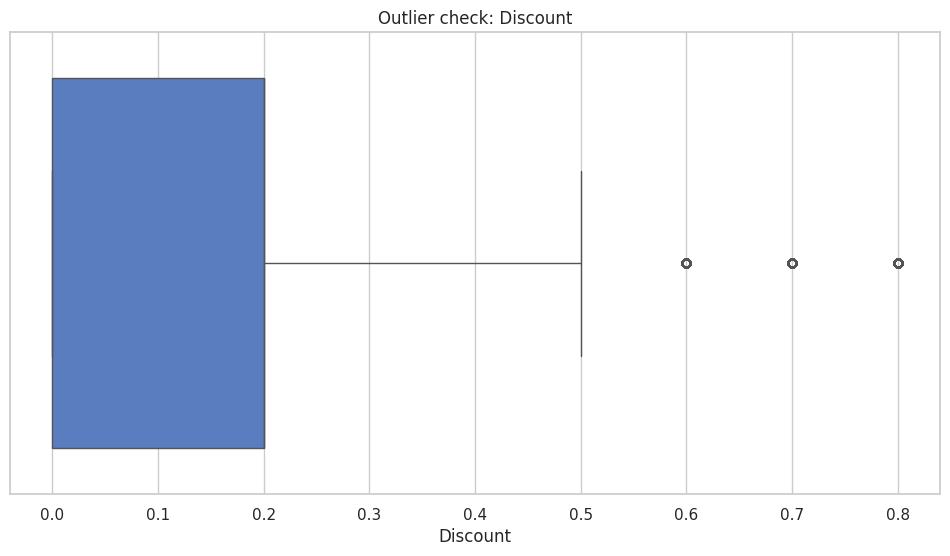

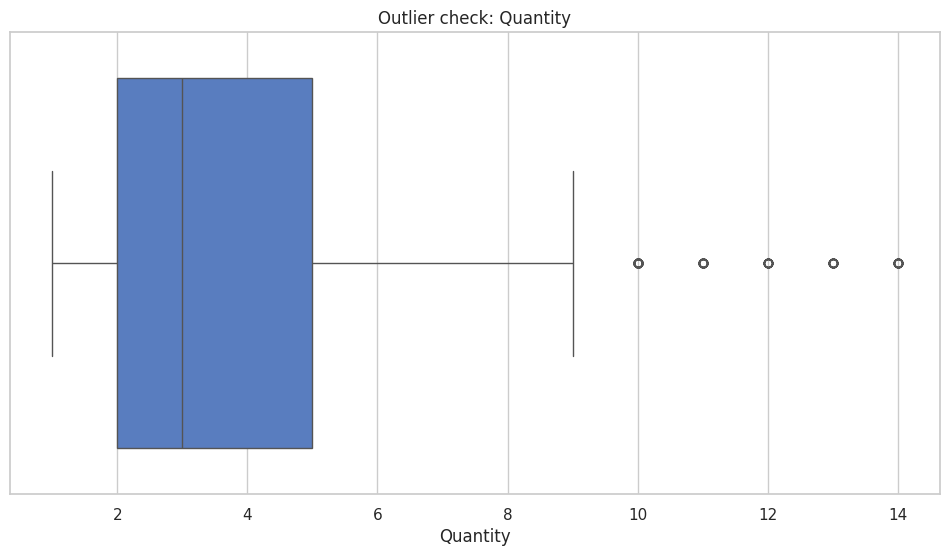

In [ ]:
import seaborn as sns
num_cols = ['Sales','Profit','Discount','Quantity']
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Outlier check: {col}")
    plt.show()


## 5. *Data Cleaning*

In [ ]:
df_cleaned = df.dropna().drop_duplicates().sort_values(by='Country')
display(df_cleaned.head())

Column,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,profit margin
2517,2518,AMER-2023-123134,5/3/2023,20230503,Austin Newman,Argentina,Córdoba,AMER,LATAM,Banco Santander,1101,Finance,Strategic,SaaS Connector Pack,2WPSW73CO6,129.93,3,0.0,12.9930,10.0
7982,7983,AMER-2020-113383,9/10/2020,20200910,Luke Bower,Argentina,Mendoza,AMER,LATAM,Costco Wholesale,1025,Retail,SMB,SaaS Connector Pack,5GWAS8XXII,254.90,5,0.0,76.4700,30.0
5033,5034,AMER-2022-155166,12/27/2022,20221227,Chloe Underwood,Argentina,Buenos Aires,AMER,LATAM,American Express,1005,Finance,Strategic,OneView,I1FLO60MG6,26.49,1,0.0,7.4172,28.0
5032,5033,AMER-2022-155166,12/27/2022,20221227,Chloe Underwood,Argentina,Buenos Aires,AMER,LATAM,American Express,1005,Finance,Strategic,FinanceHub,584T84MAO2,212.94,3,0.0,25.5528,12.0
6837,6838,AMER-2021-116260,7/6/2021,20210706,Emily Blake,Argentina,Buenos Aires,AMER,LATAM,Comcast,1022,Communications,Strategic,ChatBot Plugin,IXTV7X40L4,11.12,4,0.0,2.8912,26.0


In [ ]:
product_name_standardization = {
    'contactmatcher': 'ContactMatcher',
    'Contact Matcher': 'ContactMatcher',
    'Contactmatcher': 'ContactMatcher',
    'site analytics': 'Site Analytics',
    'Site analytics': 'Site Analytics',
    'SiteAnalytics': 'Site Analytics',
    'storage': 'Storage',
    'STORAGE': 'Storage',
    'Storage ': 'Storage',
    'financehub': 'FinanceHub',
    'FinanceHub': 'FinanceHub',
    'Finance Hub': 'FinanceHub',
    'support': 'Support',
    'Support ': 'Support'
}

df_cleaned['Product_Standardized'] = df_cleaned['Product'].str.strip()
df_cleaned['Product_Standardized'] = df_cleaned['Product_Standardized'].replace(product_name_standardization)

print("=== DEBUGGING PRODUCT NAMES ===")
print("Unique products after standardization:")
print(df_cleaned['Product_Standardized'].value_counts())

=== DEBUGGING PRODUCT NAMES ===
Unique products after standardization:
Product_Standardized
ContactMatcher                1842
Support                       1560
FinanceHub                     981
SaaS Connector Pack            957
Site Analytics                 889
Marketing Suite - Gold         846
ChatBot Plugin                 796
Data Smasher                   775
OneView                        466
SaaS Connector Pack - Gold     254
Marketing Suite                228
Storage                        217
Big Ol Database                115
Alchemy                         68
Name: count, dtype: int64


**Grafik berikut menampilkan total penjualan tiap produkdengan fokus pengamatan pada; produk yang mendominasi penjualan vs produk yang kurang berkinerja.**

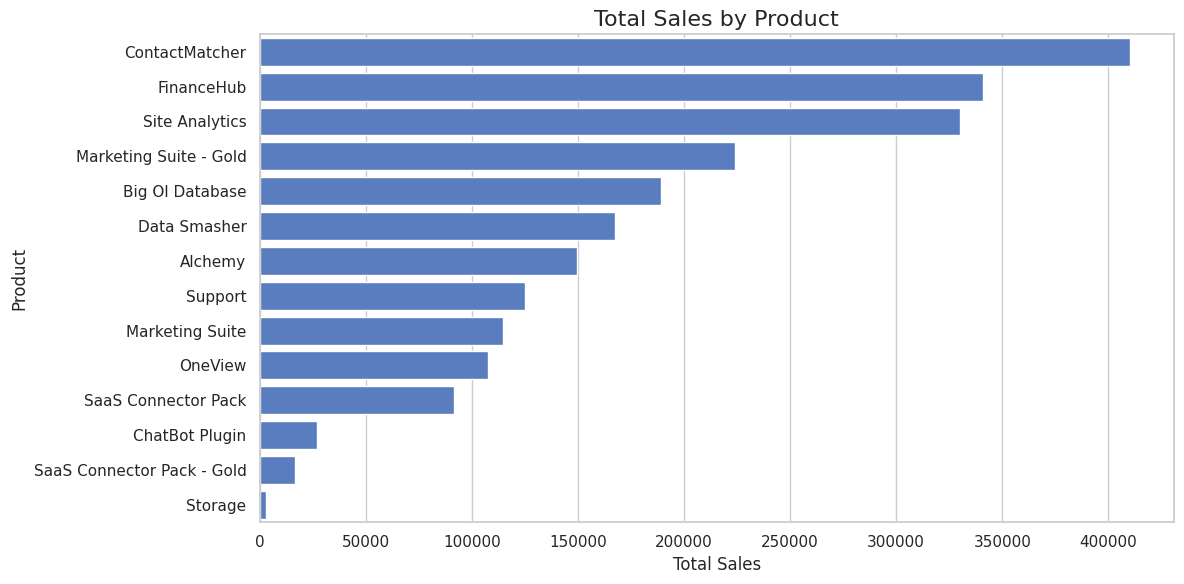

In [ ]:
plt.figure(figsize=(12,6))
sales_by_product = df_cleaned.groupby("Product")[["Sales","Profit"]].sum().sort_values("Sales", ascending=False)

sns.barplot(data=sales_by_product.reset_index(), x="Sales", y="Product")
plt.title("Total Sales by Product", fontsize=16)
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

Produk seperti **ContactMatcher**, **FinanceHub**, dan **Site Analytics** mendominasi total penjualan, menunjukkan tingkat permintaan yang tinggi serta kontribusi besar terhadap pendapatan keseluruhan. Sebaliknya, produk seperti Storage, SaaS Connector Pack – Gold, dan ChatBot Plugin menghasilkan penjualan yang relatif rendah, yang dapat mengindikasikan permintaan pasar terbatas atau strategi pemasaran yang kurang optimal.

# Profit Margins

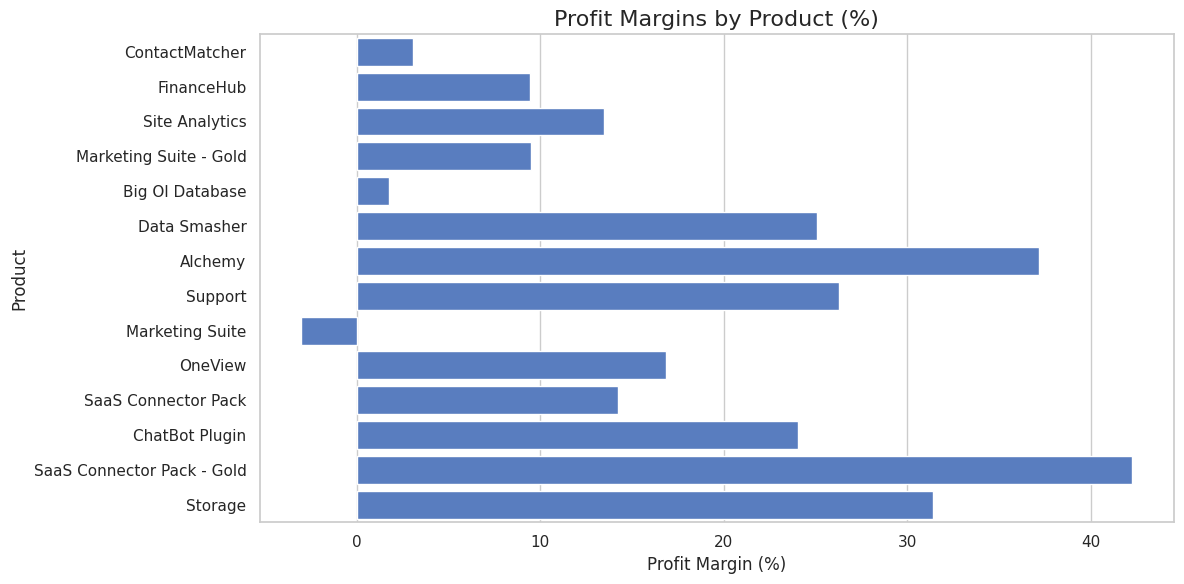

In [ ]:
sales_by_product["Profit Margin"] = (sales_by_product["Profit"] / sales_by_product["Sales"]) * 100

plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_product.reset_index(), x="Profit Margin", y="Product")
plt.title("Profit Margins by Product (%)", fontsize=16)
plt.xlabel("Profit Margin (%)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi profit margin per produk di atas, terlihat bahwa tidak semua produk dengan penjualan tinggi memiliki margin keuntungan yang besar. Sebaliknya, beberapa produk dengan penjualan relatif rendah justru menunjukkan margin keuntungan yang lebih tinggi, seperti **Storage** dan **SaaS Connector Pack – Gold**. Hal ini dapat berpotensi strategis untuk melakukan reposisi pasar atau meningkatkan strategi pemasaran pada produk-produk dengan margin tinggi namun penjualan rendah, sehingga perusahaan dapat mengoptimalkan profitabilitas keseluruhan tanpa hanya bergantung pada produk dengan volume penjualan besar tetapi margin tipis.

# Sales and Profit by Industry

Bagaimana industri berbeda dalam menghasilkan pendapatan dan profitabilitas?

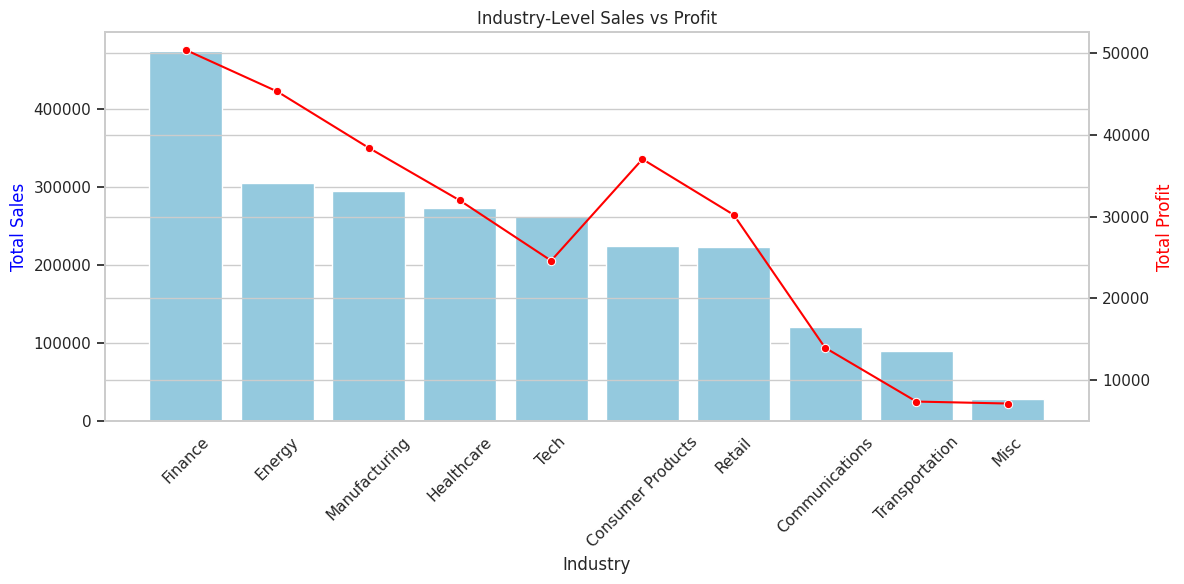

In [ ]:
industry_perf = df.groupby("Industry")[["Sales","Profit"]].sum().sort_values("Sales", ascending=False)

fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data=industry_perf.reset_index(), x="Industry", y="Sales", ax=ax1, color="skyblue")
ax1.set_ylabel("Total Sales", color="blue")
ax1.set_xlabel("Industry")
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
sns.lineplot(data=industry_perf.reset_index(), x="Industry", y="Profit", ax=ax2, marker="o", color="red")
ax2.set_ylabel("Total Profit", color="red")

plt.title("Industry-Level Sales vs Profit")
plt.tight_layout()
plt.show()

Visualisasi data di atas menunjukkan bahwa kontribusi pendapatan tidak merata antar industri. Beberapa sektor seperti Finance memberikan kontribusi penjualan dan profit yang jauh lebih besar dibandingkan industri lain, sehingga menjadi pendorong utama kinerja bisnis. Namun, terdapat pula industri dengan penjualan moderat tetapi menghasilkan profit tinggi, yang menandakan keberadaan high-value niches.

# Region Breakdown

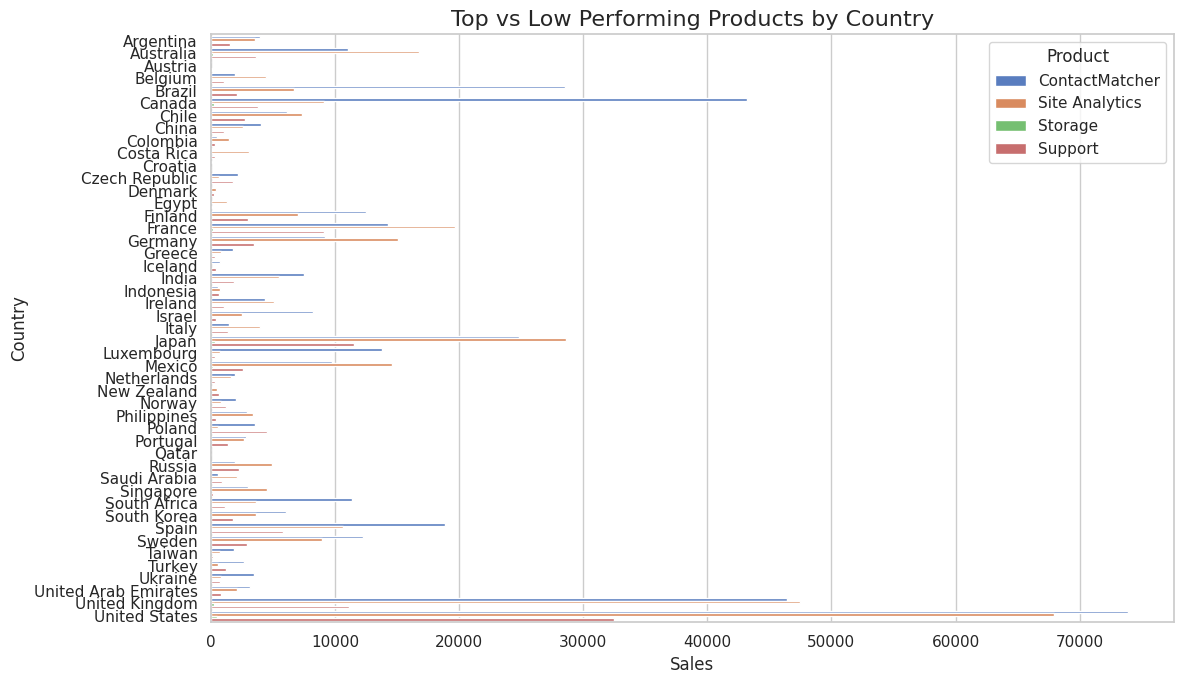

In [ ]:
top_products = ["Site Analytics", "Support", "ContactMatcher", "Storage", "Financehub"]
prod_country = df[df["Product"].isin(top_products)].groupby(["Country","Product"])["Sales"].sum().reset_index()

plt.figure(figsize=(12,7))
sns.barplot(data=prod_country, x="Sales", y="Country", hue="Product")
plt.title("Top vs Low Performing Products by Country", fontsize=16)
plt.xlabel("Sales")
plt.ylabel("Country")
plt.legend(title="Product")
plt.tight_layout()
plt.show()

Beberapa produk seperti **ContactMatcher** mendominasi secara global dengan kontribusi signifikan di hampir semua negara, sementara produk lain seperti **Storage** justru menunjukkan kinerja rendah di hampir seluruh pasar. Menariknya, terdapat produk tertentu yang menampilkan performa cukup baik hanya di negara-negara spesifik, misalnya **Support** yang menonjol di beberapa wilayah saja. Hal ini menunjukkan bahwa keberhasilan produk dapat sangat dipengaruhi oleh konteks lokal, sehingga diperlukan strategi pemasaran yang lebih terarah dan spesifik per negara agar potensi pasar dapat dimaksimalkan.

#Rata - Rata Profit dan Discount berdasarkan Country  

In [ ]:
average_profit_margin_by_country = df.groupby('Country')['profit margin'].mean().reset_index()
average_profit_margin_by_country = average_profit_margin_by_country.sort_values(by='profit margin', ascending=False)
average_profit_margin_by_country['profit margin'] = average_profit_margin_by_country['profit margin'].map('{:.2f}%'.format) # Add percentage symbol

print("Rata-rata Profit Margin per Negara (Diurutkan dari Terbesar ke Terkecil):")
display(average_profit_margin_by_country)

Rata-rata Profit Margin per Negara (Diurutkan dari Terbesar ke Terkecil):


,Country,profit margin
2,Austria,42.20%
45,United Arab Emirates,37.95%
10,Croatia,37.75%
27,Netherlands,37.05%
12,Denmark,36.38%
25,Luxembourg,35.80%
33,Qatar,35.14%
30,Philippines,35.01%
19,India,34.79%
31,Poland,34.61%


In [ ]:
average_discount_by_country = df.groupby('Country')['Discount'].mean().reset_index()
average_discount_by_country = average_discount_by_country.sort_values(by='Discount', ascending=False)
average_discount_by_country['Discount'] = (average_discount_by_country['Discount'] * 100).map('{:.2f}%'.format)

print("Rata-rata Discount per Negara (Diurutkan dari Terbesar ke Terkecil):")
display(average_discount_by_country)

Rata-rata Discount per Negara (Diurutkan dari Terbesar ke Terkecil):


,Country,Discount
1,Australia,39.00%
24,Japan,37.02%
15,France,32.86%
26,Mexico,32.49%
34,Russia,31.65%
6,Chile,30.36%
16,Germany,29.93%
38,South Africa,29.13%
3,Belgium,28.87%
41,Sweden,28.35%


In [ ]:
total_quantity_by_country = df.groupby('Country')['Quantity'].sum().reset_index()
total_quantity_by_country = total_quantity_by_country.sort_values(by='Quantity', ascending=False)

print("Total Quantity per Negara (Diurutkan dari Terbanyak ke Terkecil):")
display(total_quantity_by_country)

Total Quantity per Negara (Diurutkan dari Terbanyak ke Terkecil):


,Country,Quantity
47,United States,7667
46,United Kingdom,4268
24,Japan,3724
15,France,2153
5,Canada,1883
1,Australia,1845
26,Mexico,1759
16,Germany,1379
41,Sweden,983
4,Brazil,946


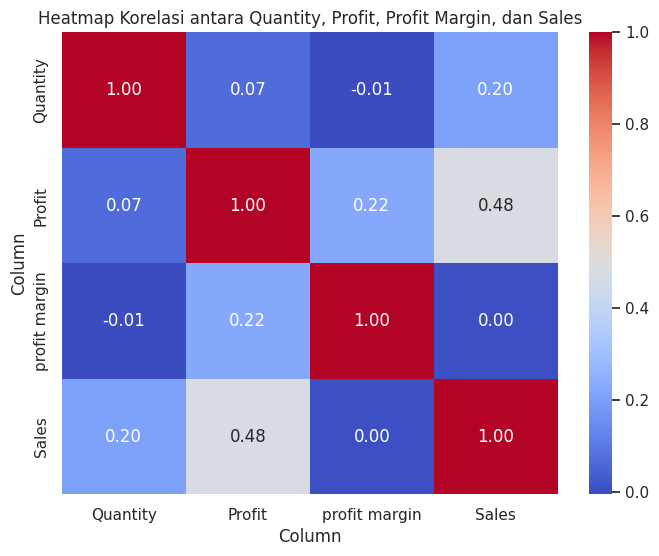

In [ ]:
correlation_matrix = df[['Quantity', 'Profit', 'profit margin', 'Sales']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antara Quantity, Profit, Profit Margin, dan Sales')
plt.show()

##Heatmap Korelasi
Heatmap ini menunjukkan seberapa kuat hubungan linier antara pasangan variabel yang berbeda. Nilai korelasi berkisar dari -1 hingga +1:

+1: Menunjukkan korelasi positif sempurna (ketika satu variabel meningkat, variabel lain juga meningkat).
-1: Menunjukkan korelasi negatif sempurna (ketika satu variabel meningkat, variabel lain menurun).
0: Menunjukkan tidak ada korelasi linier.


Sales dan Profit (0.48): Terdapat korelasi positif moderat antara Sales dan Profit. Ini berarti, secara umum, ketika penjualan meningkat, profit juga cenderung meningkat, tetapi hubungannya tidak terlalu kuat.

Sales dan Quantity (0.20): Ada korelasi positif yang lemah antara Sales dan Quantity. Ini menunjukkan bahwa jumlah item yang terjual memiliki hubungan yang lemah dengan total nilai penjualan.

Profit dan Quantity (0.07): Korelasi antara Profit dan Quantity sangat lemah, hampir tidak ada. Menjual lebih banyak item tidak secara langsung berkorelasi kuat dengan profit yang lebih tinggi.

Profit Margin dan Profit (0.22): Terdapat korelasi positif yang lemah antara Profit Margin dan Profit. Ini berarti, meskipun profit margin yang lebih tinggi cenderung berkontribusi pada profit keseluruhan, ada faktor lain yang lebih signifikan mempengaruhi total profit.

Profit Margin dan Sales (0.00): Korelasinya sangat dekat dengan nol. Ini menegaskan temuan sebelumnya bahwa tingginya penjualan tidak secara langsung berkorelasi dengan tingginya profit margin. Produk dengan penjualan rendah bisa saja memiliki profit margin yang tinggi, dan sebaliknya.

Profit Margin dan Quantity (-0.01): Korelasinya juga sangat dekat dengan nol. Jumlah item yang terjual tidak berkorelasi dengan profit margin.

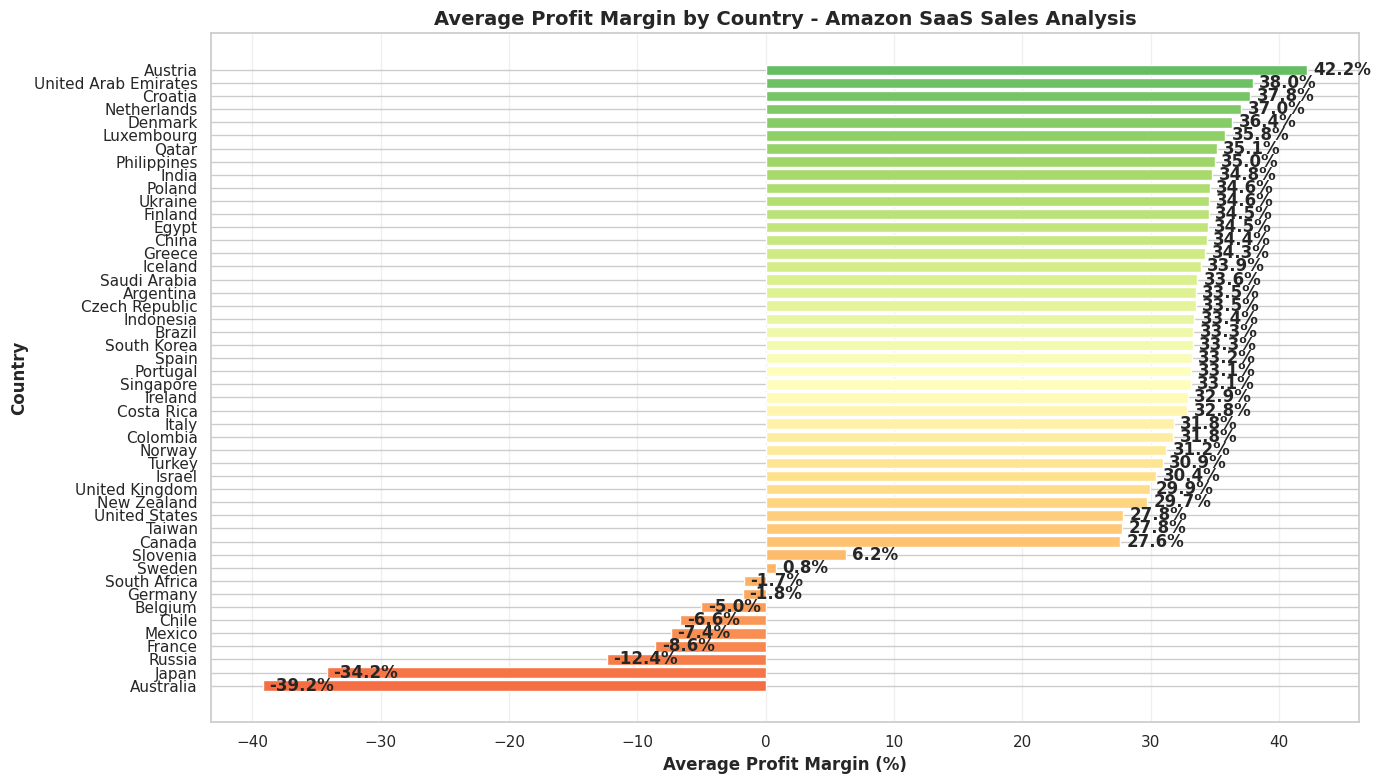

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
df_plot = average_profit_margin_by_country.copy()
df_plot['profit_margin_numeric'] = df_plot['profit margin'].str.rstrip('%').astype(float)
df_plot = df_plot.sort_values('profit_margin_numeric', ascending=True)

colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(df_plot)))
bars = plt.barh(df_plot['Country'], df_plot['profit_margin_numeric'], color=colors)

for i, (bar, value) in enumerate(zip(bars, df_plot['profit_margin_numeric'])):
    plt.text(value + 0.5, i, f'{value:.1f}%', va='center', fontweight='bold')

plt.xlabel('Average Profit Margin (%)', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Average Profit Margin by Country - Amazon SaaS Sales Analysis', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#Konfirmasi Hipotesis
Berdasarkan tabel diatas, ditunjukkan bahwa negara yang memberikan discount paling besar seperti Australia memiliki profit margin paling kecil dibanding negara lain, dan negara yang tidak memberikan diskon sama sekali seperti Austria memiki profit margin paling tinggi.
Hal ini membuktikan bahwa hipotesis pertama dan kedua adalah salah. Walaupun negara yang memberikan diskon paling besar mendapatkan nilai quantity yang besar, bukan berarti profit marginnya akan naik.  



# Kesimpulan

- Tingginya **Sales** tidak dapat dijadikan refleksi **Profibilitas**
- Industri Finance menjadi kontributor terbesar dalam penjualan dan profit, sementara beberapa sektor seperti **Transportation** dan **Miscellaneous** relatif kecil kontribusinya. Adanya industri dengan penjualan menengah namun profit tinggi yang menandakan adanya niche bernilai tinggi.
- **ContactMatcher** mendominasi penjualan global dengan kontribusi signifikan di hampir semua negara, terutama di United States dan United Kingdom, sedangkan Storage menunjukkan volume rendah namun margin tinggi di seluruh pasar.
- Konfirmasi hypothesis menunjukkan bahwa tingginya discount tidak berkorelasi dengan peningkatan profit.
- Visualisasi profit margin per negara menunjukkan variasi signifikan dengan beberapa market menghasilkan margin 2-3 kali lebih tinggi, mengindikasikan perbedaan daya beli dan positioning produk yang berbeda.
- Korelasi yang sangat lemah antara quantity dan profit (0.07) menunjukkan bahwa volume-based strategy tidak selalu mengoptimalkan keuntungan.

# Rekomendasi
- Beralih dari mengejar volume penjualan ke optimalisasi profit margin dan customer lifetime value, dengan fokus pada produk high-margin seperti Storage.
- Menerpkan diskon selektif untuk akuisisi pelanggan bernilai tinggi atau penetrasi pasar baru, dan ganti sebagian dengan value-added services, mengingat blanket discount yang terbukti tidak memningkatkan profit
- Sejumlah industri yang meskipun penjualannya lebih rendah, mampu memberikan margin keuntungan yang tinggi, sehingga penting bagi perusahaan untuk memfokuskan pada segmen-segmen bernilai tinggi tersebut.
- Terapkan pendekatan market-specific pricing: premium pricing di negara margin tinggi (misalnya Austria dan Eropa Barat), penetration pricing di negara dengan volume tinggi tapi margin rendah (misalnya Australia).

Link Visualisasi Tablue: [Di Sini](https://public.tableau.com/app/profile/muhammad.rafi.lingga/viz/CapstoneProject2Finished/MainDasboard?publish=yes)